In [2]:
import torchvision
import torch.nn as nn
import torch.nn.functional as nnf
import torch
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms.functional import to_tensor, normalize
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torchvision import transforms, models
from torchvision.datasets import Food101
from torchvision.models import ResNet50_Weights
import os
import shutil
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(torch.cuda.get_device_name(0))

def test_acc(net: nn.Module, test_loader: DataLoader):

	net.to(device)
	net.eval()
	
	total = 0
	correct = 0

	for images, labels in test_loader:
		images, labels = images.to(device), labels.to(device)
		total += labels.size(0)

		outputs = net(images)
		_, predicted = torch.max(outputs, 1)
		correct += (predicted == labels).sum().item()

	return correct / total * 100

def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader,
             net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer, train_dataset_length):

	losses = []
	accuracies = []

	net.to(device)

	for e in range(epochs):
		net.train()
		running_loss = 0.0

		for images, labels in train_loader:
			images, labels = images.to(device), labels.type(torch.LongTensor).to(device)

			optimizer.zero_grad()
			outputs = net(images)
			loss = loss_fn(outputs, labels)
			loss.backward()
			optimizer.step()

			running_loss += loss.item() * images.size(0)

		epoch_loss = running_loss / train_dataset_length

		print(f"Loss-ul la finalul epocii {e + 1}: {epoch_loss}")

		acc = test_acc(net, test_loader)
		print(f"Acuratetea la finalul epocii {e + 1} este {acc:.2f}%")

		losses.append(epoch_loss)
		accuracies.append(acc)

	loss_graph(losses)
	accuracy_graph(accuracies)

def loss_graph(losses):
    plt.plot(losses)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

def accuracy_graph(accuracies):
    plt.plot(accuracies)

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

cuda
NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dir = "data/train"
val_dir = "data/test"

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(val_dir, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
len(train_dataset.classes)

101

Training started
Loss-ul la finalul epocii 1: 3.003362649942782
Acuratetea la finalul epocii 1 este 43.82%
Loss-ul la finalul epocii 2: 2.107947537812463
Acuratetea la finalul epocii 2 este 49.58%
Loss-ul la finalul epocii 3: 1.8971661885264683
Acuratetea la finalul epocii 3 este 51.64%
Loss-ul la finalul epocii 4: 1.7748505429780916
Acuratetea la finalul epocii 4 este 51.64%
Loss-ul la finalul epocii 5: 1.697144288953775
Acuratetea la finalul epocii 5 este 54.59%
Loss-ul la finalul epocii 6: 1.6221988953379514
Acuratetea la finalul epocii 6 este 54.20%
Loss-ul la finalul epocii 7: 1.5813408573547212
Acuratetea la finalul epocii 7 este 53.82%
Loss-ul la finalul epocii 8: 1.522713335842976
Acuratetea la finalul epocii 8 este 54.99%
Loss-ul la finalul epocii 9: 1.4970856337657463
Acuratetea la finalul epocii 9 este 55.07%
Loss-ul la finalul epocii 10: 1.460578350627383
Acuratetea la finalul epocii 10 este 55.47%
Loss-ul la finalul epocii 11: 1.4407302418164294
Acuratetea la finalul epoci

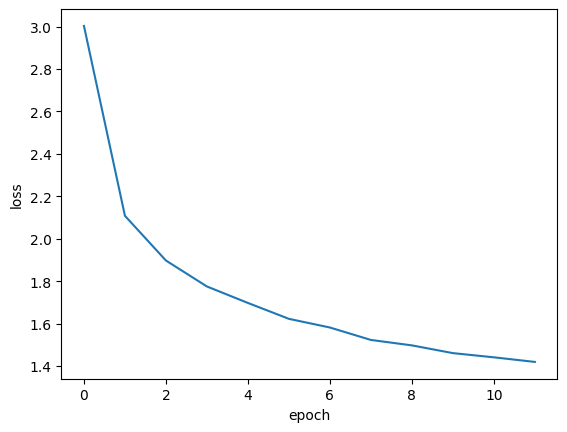

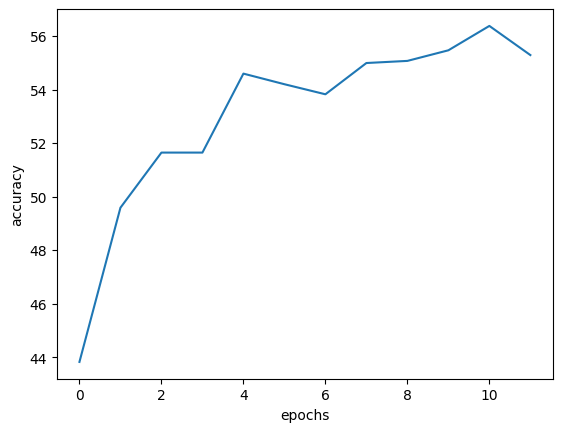

Duration of training: 67.53078019618988


In [7]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 12
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 3.081079120510089
Acuratetea la finalul epocii 1 este 45.90%
Loss-ul la finalul epocii 2: 2.044620286891169
Acuratetea la finalul epocii 2 este 51.03%
Loss-ul la finalul epocii 3: 1.69384435235077
Acuratetea la finalul epocii 3 este 51.88%
Loss-ul la finalul epocii 4: 1.5218661246756122
Acuratetea la finalul epocii 4 este 52.65%
Loss-ul la finalul epocii 5: 1.376875594661574
Acuratetea la finalul epocii 5 este 53.33%
Loss-ul la finalul epocii 6: 1.2340983392539198
Acuratetea la finalul epocii 6 este 53.74%
Loss-ul la finalul epocii 7: 1.144150155196489
Acuratetea la finalul epocii 7 este 53.90%
Loss-ul la finalul epocii 8: 1.0894573561665248
Acuratetea la finalul epocii 8 este 53.31%
Loss-ul la finalul epocii 9: 1.0371115837946976
Acuratetea la finalul epocii 9 este 54.40%
Loss-ul la finalul epocii 10: 0.9782534133325709
Acuratetea la finalul epocii 10 este 52.95%
Loss-ul la finalul epocii 11: 0.9250365636687075
Acuratetea la finalul epocii

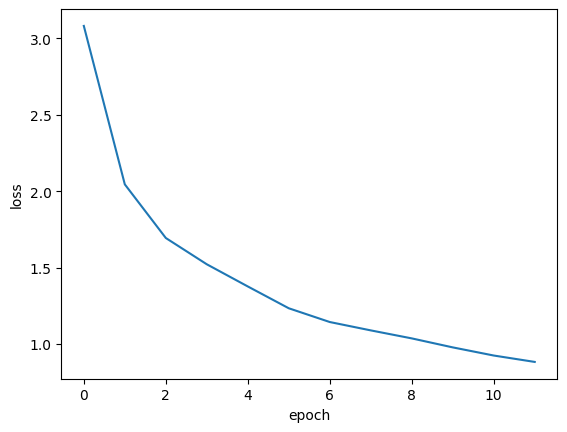

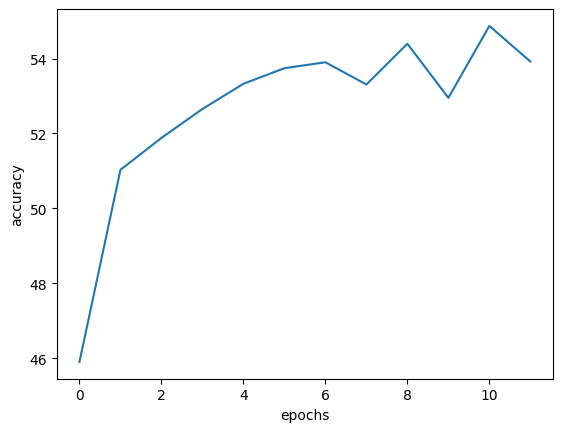

Duration of training: 79.72394436995188


In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 12
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.984332027120559
Acuratetea la finalul epocii 1 este 44.10%
Loss-ul la finalul epocii 2: 2.0752104894870973
Acuratetea la finalul epocii 2 este 50.10%
Loss-ul la finalul epocii 3: 1.8316994041971641
Acuratetea la finalul epocii 3 este 51.09%
Loss-ul la finalul epocii 4: 1.688598360558941
Acuratetea la finalul epocii 4 este 53.62%
Loss-ul la finalul epocii 5: 1.5807579373683867
Acuratetea la finalul epocii 5 este 54.46%
Loss-ul la finalul epocii 6: 1.508398028049532
Acuratetea la finalul epocii 6 este 54.53%
Loss-ul la finalul epocii 7: 1.4577235056936937
Acuratetea la finalul epocii 7 este 54.67%
Loss-ul la finalul epocii 8: 1.398216024987375
Acuratetea la finalul epocii 8 este 54.91%
Loss-ul la finalul epocii 9: 1.3252378053476315
Acuratetea la finalul epocii 9 este 55.35%
Loss-ul la finalul epocii 10: 1.2980224394719593
Acuratetea la finalul epocii 10 este 55.62%


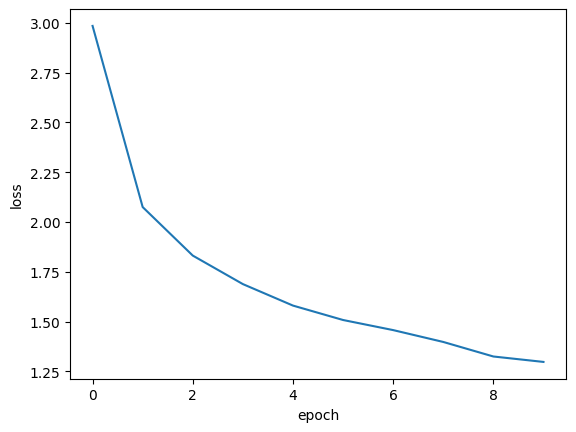

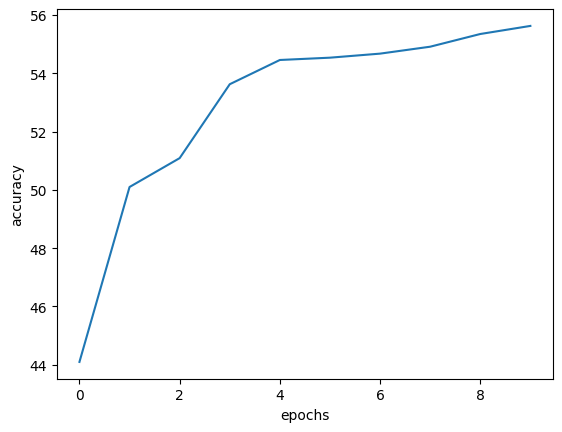

Duration of training: 48.22145209312439


In [9]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.LeakyReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.752225825149234
Acuratetea la finalul epocii 1 este 45.78%
Loss-ul la finalul epocii 2: 1.9627413496011161
Acuratetea la finalul epocii 2 este 49.72%
Loss-ul la finalul epocii 3: 1.7327472404599584
Acuratetea la finalul epocii 3 este 51.88%
Loss-ul la finalul epocii 4: 1.6026063815359235
Acuratetea la finalul epocii 4 este 52.69%
Loss-ul la finalul epocii 5: 1.5137876959759804
Acuratetea la finalul epocii 5 este 53.09%
Loss-ul la finalul epocii 6: 1.4367134041676033
Acuratetea la finalul epocii 6 este 51.15%
Loss-ul la finalul epocii 7: 1.3712126957229263
Acuratetea la finalul epocii 7 este 52.32%
Loss-ul la finalul epocii 8: 1.3298223209538476
Acuratetea la finalul epocii 8 este 53.50%
Loss-ul la finalul epocii 9: 1.2827396533355462
Acuratetea la finalul epocii 9 este 53.25%
Loss-ul la finalul epocii 10: 1.2532014504360287
Acuratetea la finalul epocii 10 este 53.17%


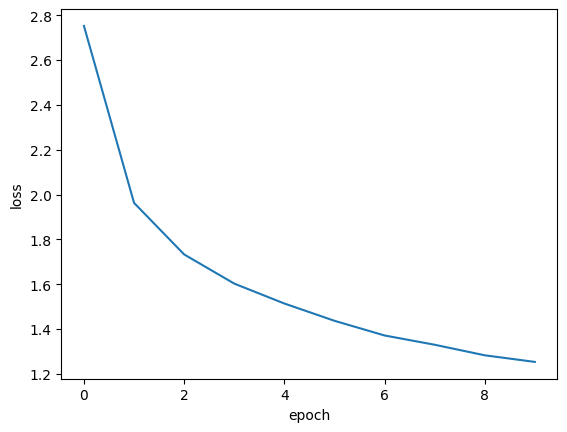

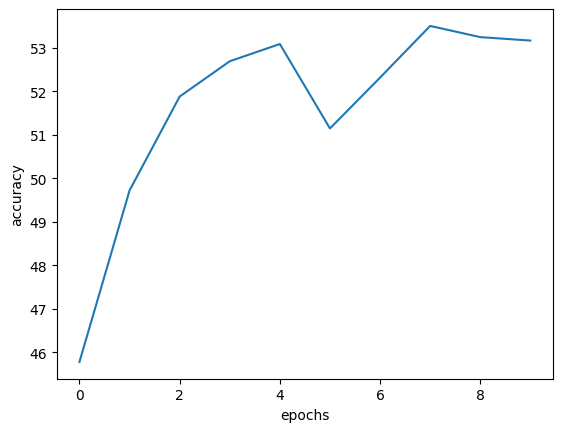

Duration of training: 45.677219939231875


In [10]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.Sigmoid(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.Sigmoid(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.82760445783634
Acuratetea la finalul epocii 1 este 41.17%
Loss-ul la finalul epocii 2: 2.252169955602967
Acuratetea la finalul epocii 2 este 36.02%
Loss-ul la finalul epocii 3: 2.3233098478915273
Acuratetea la finalul epocii 3 este 31.76%
Loss-ul la finalul epocii 4: 2.431577464534898
Acuratetea la finalul epocii 4 este 35.39%
Loss-ul la finalul epocii 5: 2.3449652303878232
Acuratetea la finalul epocii 5 este 38.14%
Loss-ul la finalul epocii 6: 2.3063742638893254
Acuratetea la finalul epocii 6 este 41.62%
Loss-ul la finalul epocii 7: 2.2880060771589625
Acuratetea la finalul epocii 7 este 38.91%
Loss-ul la finalul epocii 8: 2.215580298688152
Acuratetea la finalul epocii 8 este 35.05%
Loss-ul la finalul epocii 9: 2.230927537675738
Acuratetea la finalul epocii 9 este 43.88%
Loss-ul la finalul epocii 10: 2.1815729218662376
Acuratetea la finalul epocii 10 este 42.34%


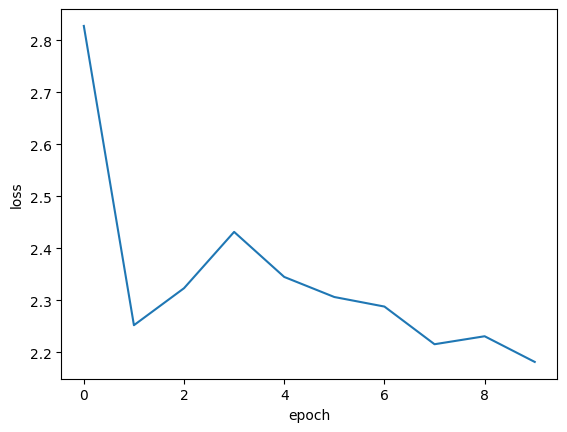

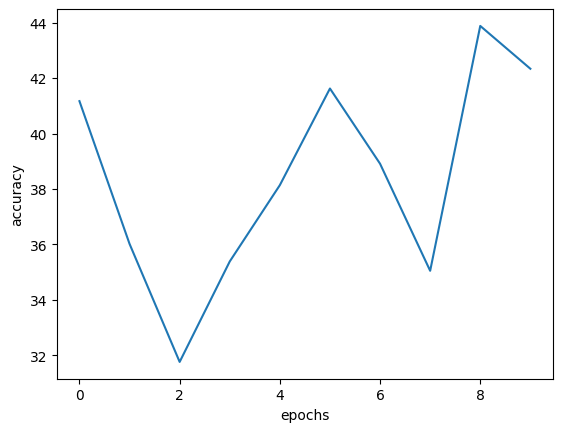

Duration of training: 45.68576996723811


In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.Tanh(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.948743046518206
Acuratetea la finalul epocii 1 este 44.55%
Loss-ul la finalul epocii 2: 2.08930755229673
Acuratetea la finalul epocii 2 este 49.50%
Loss-ul la finalul epocii 3: 1.8409767489228706
Acuratetea la finalul epocii 3 este 52.24%
Loss-ul la finalul epocii 4: 1.702685177648815
Acuratetea la finalul epocii 4 este 53.60%
Loss-ul la finalul epocii 5: 1.615744989634347
Acuratetea la finalul epocii 5 este 54.26%
Loss-ul la finalul epocii 6: 1.5440935794276374
Acuratetea la finalul epocii 6 este 54.67%
Loss-ul la finalul epocii 7: 1.4787115701039633
Acuratetea la finalul epocii 7 este 54.89%
Loss-ul la finalul epocii 8: 1.4228169222476066
Acuratetea la finalul epocii 8 este 54.67%
Loss-ul la finalul epocii 9: 1.3889542832232937
Acuratetea la finalul epocii 9 este 54.44%
Loss-ul la finalul epocii 10: 1.3390540589436446
Acuratetea la finalul epocii 10 este 54.93%


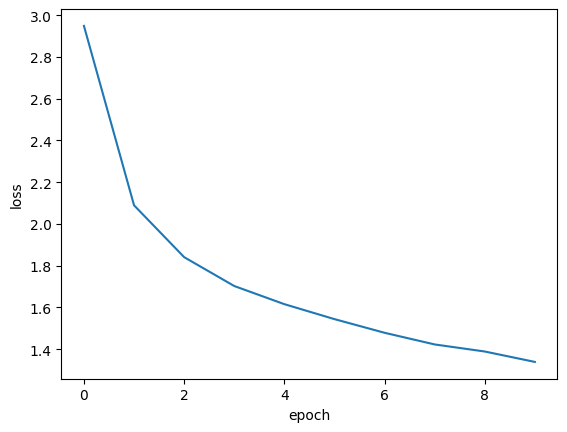

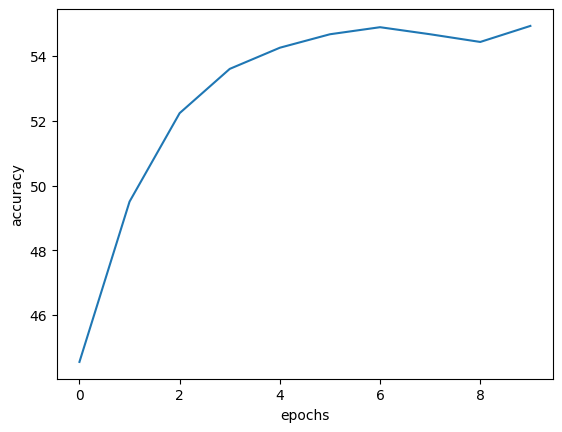

Duration of training: 45.52653397719065


In [12]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.GELU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.GELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.7823452934416215
Acuratetea la finalul epocii 1 este 47.52%
Loss-ul la finalul epocii 2: 1.9659952034021762
Acuratetea la finalul epocii 2 este 50.48%
Loss-ul la finalul epocii 3: 1.7234606070565706
Acuratetea la finalul epocii 3 este 51.84%
Loss-ul la finalul epocii 4: 1.5906360514643956
Acuratetea la finalul epocii 4 este 51.80%
Loss-ul la finalul epocii 5: 1.4935203028197335
Acuratetea la finalul epocii 5 este 51.82%
Loss-ul la finalul epocii 6: 1.4062849050622568
Acuratetea la finalul epocii 6 este 53.07%
Loss-ul la finalul epocii 7: 1.336015062143307
Acuratetea la finalul epocii 7 este 53.31%
Loss-ul la finalul epocii 8: 1.2710671628819834
Acuratetea la finalul epocii 8 este 54.06%
Loss-ul la finalul epocii 9: 1.2066855679880275
Acuratetea la finalul epocii 9 este 54.53%
Loss-ul la finalul epocii 10: 1.1614942001116157
Acuratetea la finalul epocii 10 este 54.06%


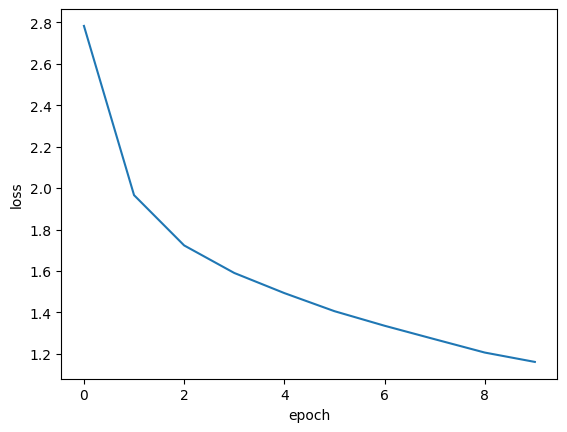

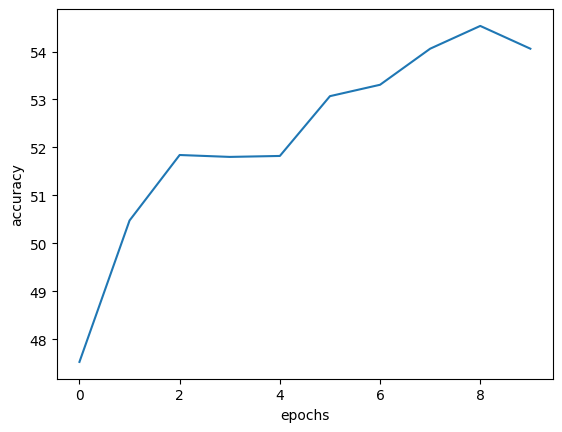

Duration of training: 45.57771514654159


In [13]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ELU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.ELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')

Training started
Loss-ul la finalul epocii 1: 2.7689291376800034
Acuratetea la finalul epocii 1 este 48.67%
Loss-ul la finalul epocii 2: 1.9561645793285307
Acuratetea la finalul epocii 2 este 51.70%
Loss-ul la finalul epocii 3: 1.7245178157504242
Acuratetea la finalul epocii 3 este 52.61%
Loss-ul la finalul epocii 4: 1.6038831604746702
Acuratetea la finalul epocii 4 este 54.16%
Loss-ul la finalul epocii 5: 1.4958719824643025
Acuratetea la finalul epocii 5 este 53.66%
Loss-ul la finalul epocii 6: 1.4363104361669459
Acuratetea la finalul epocii 6 este 52.95%
Loss-ul la finalul epocii 7: 1.3597361443381104
Acuratetea la finalul epocii 7 este 54.12%
Loss-ul la finalul epocii 8: 1.314529145621624
Acuratetea la finalul epocii 8 este 54.55%
Loss-ul la finalul epocii 9: 1.2564156902505226
Acuratetea la finalul epocii 9 este 54.79%
Loss-ul la finalul epocii 10: 1.189550335430863
Acuratetea la finalul epocii 10 este 54.04%


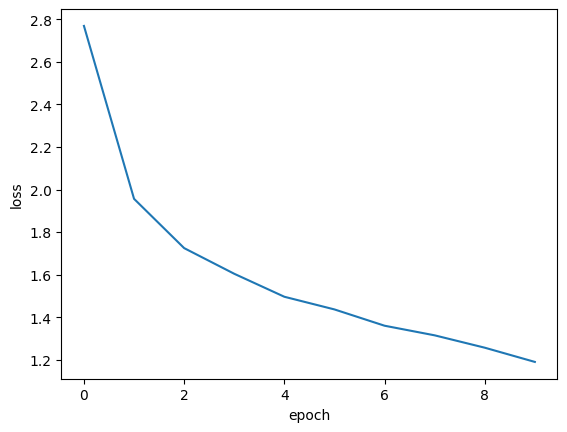

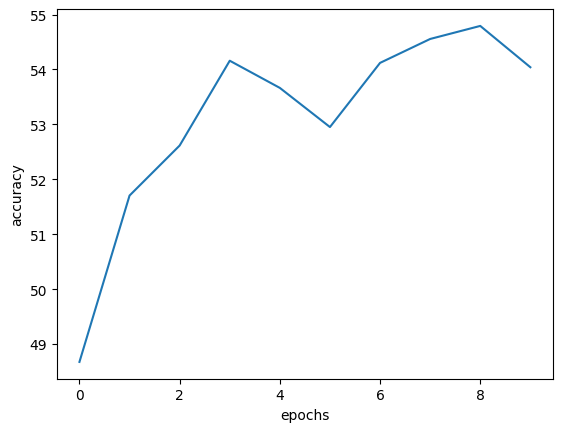

Duration of training: 45.82024508317311


In [14]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        resnet = nn.Sequential(*list(resnet.children())[:-1])
        for param in resnet.parameters():
            param.requires_grad = False

        self.model = nn.Sequential(
            resnet,
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.SELU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.25),
            nn.Linear(512, 128),
            nn.SELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, 101)
        )

    def forward(self, x):
        return self.model(x)
    
model = Model()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, betas=(0.95, 0.999), weight_decay=0.0001)
 
epochs = 10
start = time.time()
print('Training started')
train_fn(epochs, train_loader, test_loader, model, loss_fn, optimizer, len(train_dataset))
end = time.time()
print(f'Duration of training: {(end - start) / 60}')